In [1]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [3]:
from math import pi, e
import matplotlib.pyplot as plt
import torch
from SourceCode.utilities import nth_derivative, plot_two_1d_functions
from SourceCode.EquationClass import MainEquationClass
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.InitConditionClass import OnePointInitialCondition
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
import time
dh = 1e-3


n_epochs = 10
n_points = 10
dh = 1e-3

# Example №1
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5}) cos(t) $$
$$ u(0)=0 $$
$$ u(1)= sin(1)*exp(-0.2) $$
$$ t \in [0,1] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [20]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
    + 0.2 * nth_derivative(nn_model(x), x, 1)
    + nn_model(x)
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

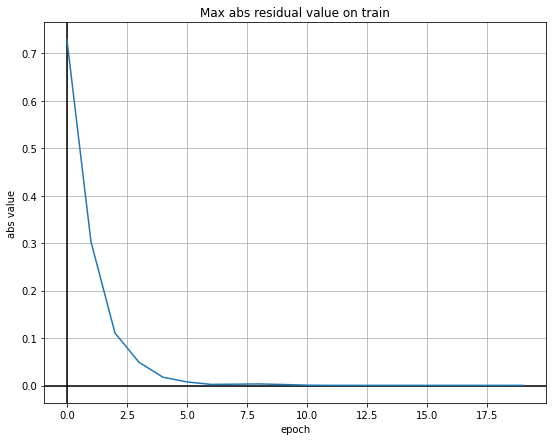

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 4.687346518039703e-06
Valid max absolute error |Appr(x)-y(x)|: 4.497356712818146e-06
MAPE on train data: 0.0005902947577851592 %
MAPE on validation data: 0.0005662957846652716 %
Max abs value of residual on train at last epoch: 0.0002996399998664856 


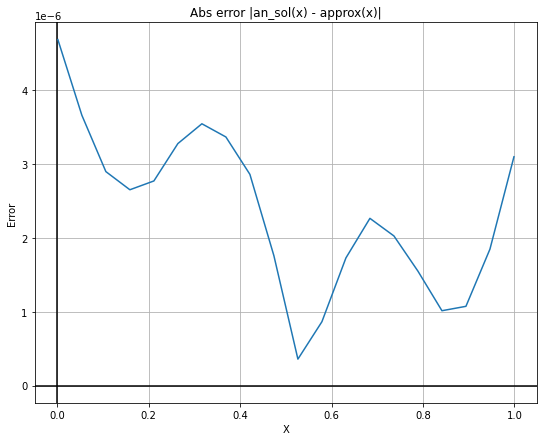

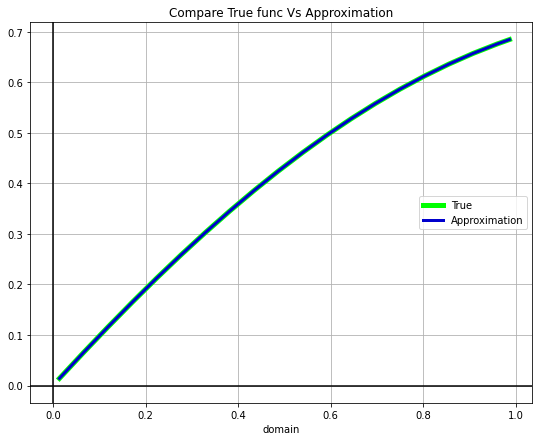

In [21]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

lets try to solve the same problem but on a smaller domain $x \in [0, 0.1]$

In [22]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
    + 0.2 * nth_derivative(nn_model(x), x, 1)
    + nn_model(x)
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound + dh, 0.1, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

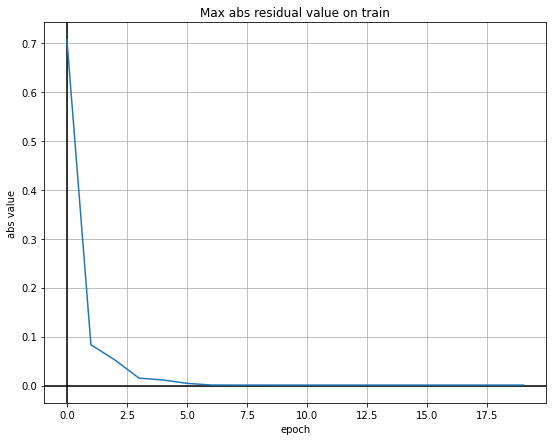

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.00467962771654129
Valid max absolute error |Appr(x)-y(x)|: 0.00461963564157486
MAPE on train data: 4.7836631536483765 %
MAPE on validation data: 4.7831375151872635 %
Max abs value of residual on train at last epoch: 0.0008778423070907593 


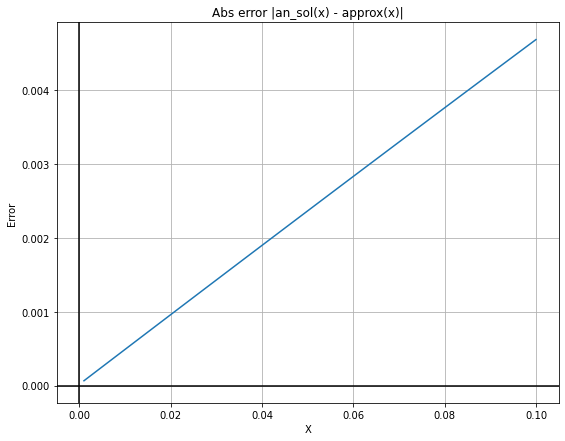

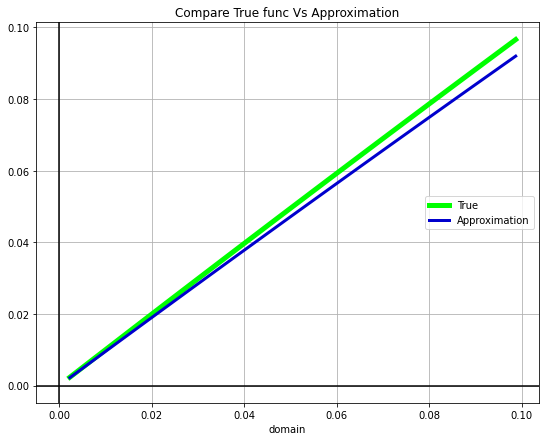

In [23]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

it is strange but descpite my expectations here on a smaller domain NN function performs worse

# Example №2
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,2] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [24]:
left_bound = 0
right_bound = 2
main_eq_residual = (
        lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
        + 0.2 * nth_derivative(nn_model(x), x, 1)
        + nn_model(x)
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x),x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

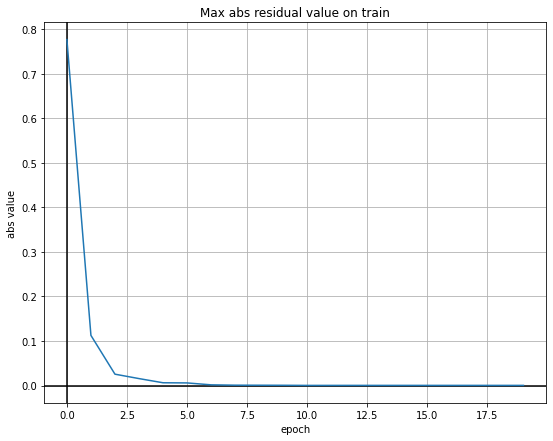

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 1.7702579498291016e-05
Valid max absolute error |Appr(x)-y(x)|: 1.7583370208740234e-05
MAPE on train data: 0.0016664420400047675 %
MAPE on validation data: 0.0016559579307795502 %
Max abs value of residual on train at last epoch: 0.0002589374780654907 


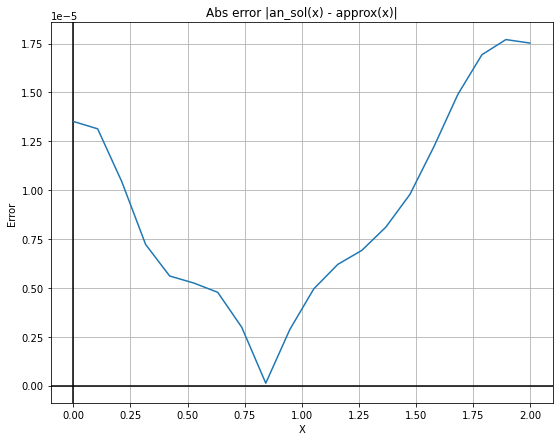

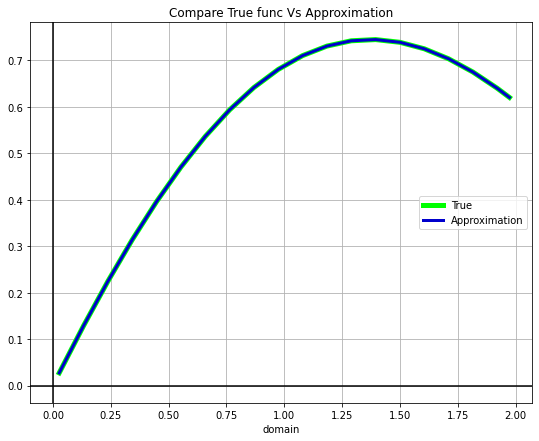

In [25]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

In [26]:
data = torch.linspace(0,10,100)
data = data.view(-1,1)

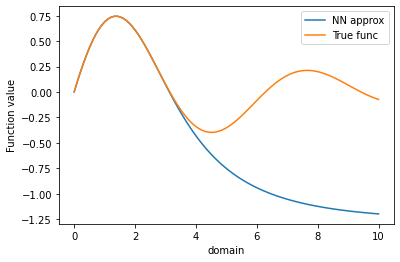

In [27]:
plt.plot(data, nn_model[0](data).detach().numpy(), label='NN approx')
plt.plot(data, analytical_solution(data).detach().numpy(), label='True func')
plt.xlabel("domain")
plt.ylabel("Function value")
plt.legend()

hmm, apparently neural networks are not good at extrapolation of an unknown function

$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,10] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

lets try to solve the same problem but with a bigger domain, $t \in [0,10]$

In [28]:
left_bound = 0
right_bound = 10
main_eq_residual = (
        lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
        + 0.2 * nth_derivative(nn_model(x), x, 1)
        + nn_model(x)
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 100

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

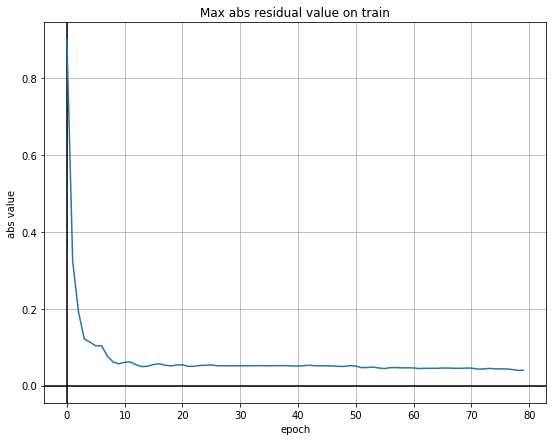

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.039815790951251984
Valid max absolute error |Appr(x)-y(x)|: 0.039773762226104736
MAPE on train data: 5.6495074182748795 %
MAPE on validation data: 5.678935721516609 %
Max abs value of residual on train at last epoch: 0.03972678631544113 


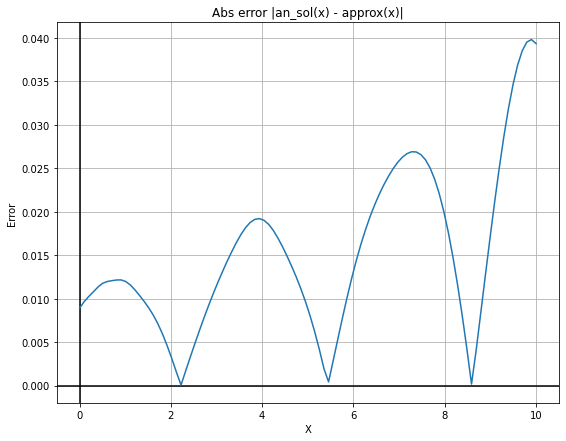

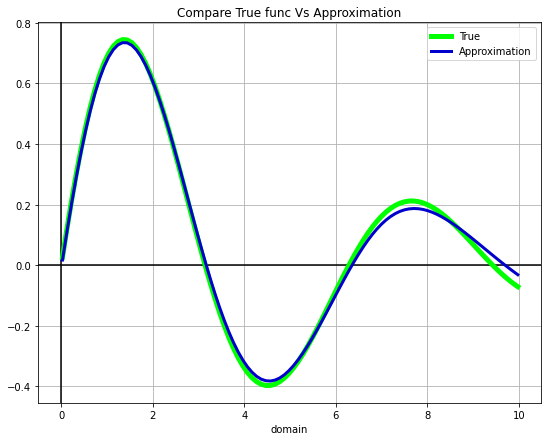

In [29]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

as you can see if domain is big then NN cannot approximate unknown function on a big domain properly

# Example №3
$$ u' + 0.2u = exp(- \frac{t}{5})cos(t) $$
$$ u(0) = 0 $$
$$ t \in [0,20] $$ 
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [30]:
left_bound = 0
right_bound = 20
main_eq_residual = (
    lambda variable, function: nth_derivative(function(variable), variable, 1)
    + 0.2 * function(variable)
    -  torch.exp(-variable / 5) * torch.cos(variable)
)
n_points = 40

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(0, first_init_cond_res)

boundary_conditions = [first_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

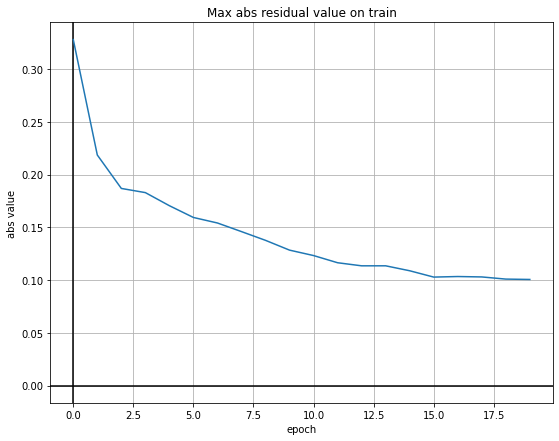

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.12083948403596878
Valid max absolute error |Appr(x)-y(x)|: 0.11967125535011292
MAPE on train data: 20.75568437576294 %
MAPE on validation data: 20.814988017082214 %
Max abs value of residual on train at last epoch: 0.1005324274301529 


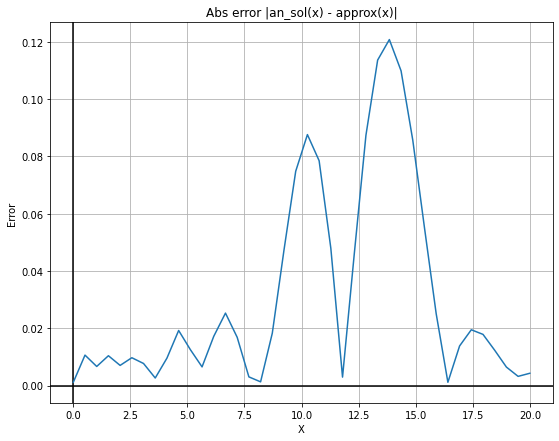

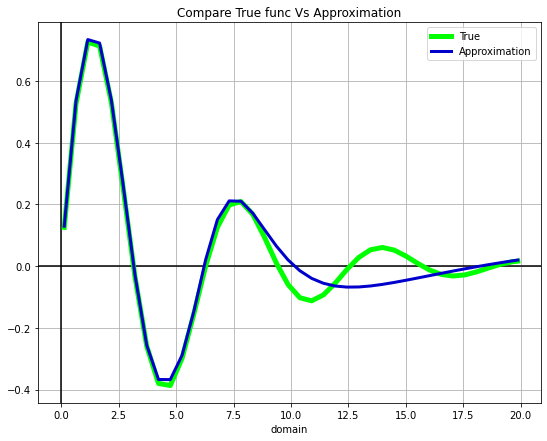

In [31]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №4
$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,2] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

In [32]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function(variable)
    - torch.cos(torch.tensor([2.0],requires_grad=True) * variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

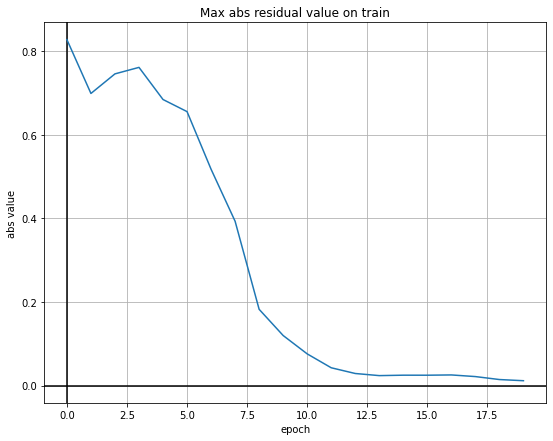

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.002988755702972412
Valid max absolute error |Appr(x)-y(x)|: 0.0030010342597961426
MAPE on train data: 0.26620153803378344 %
MAPE on validation data: 0.26515605859458447 %
Max abs value of residual on train at last epoch: 0.01145249605178833 


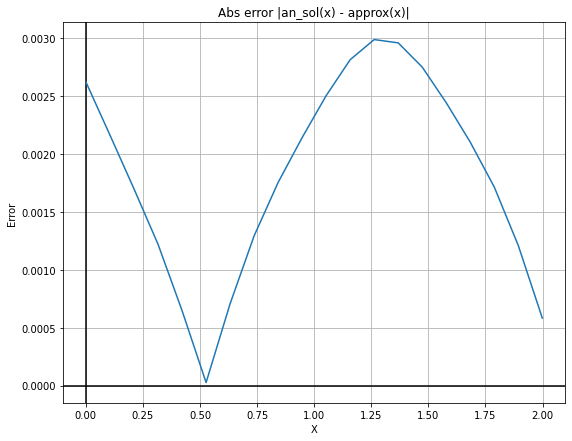

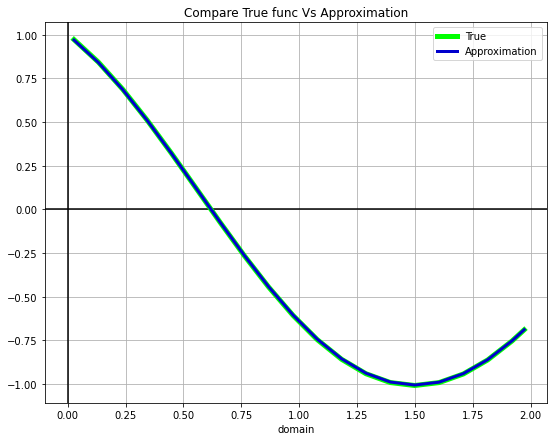

In [33]:
analytical_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,10] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

Again, if we expand domain we will see that there is no convergence. But we can resolve this issue by adding extra points to domain

In [24]:
left_bound = 0
right_bound = 5
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function(variable)
    - torch.cos(torch.tensor([2.0],requires_grad=True)*variable)
)
n_points = 50

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) + torch.tensor([1.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

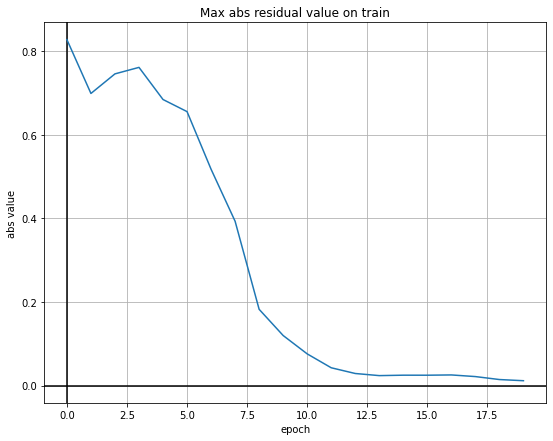

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.002988755702972412
Valid max absolute error |Appr(x)-y(x)|: 0.0030010342597961426
MAPE on train data: 0.26620153803378344 %
MAPE on validation data: 0.26515605859458447 %
Max abs value of residual on train at last epoch: 0.01145249605178833 


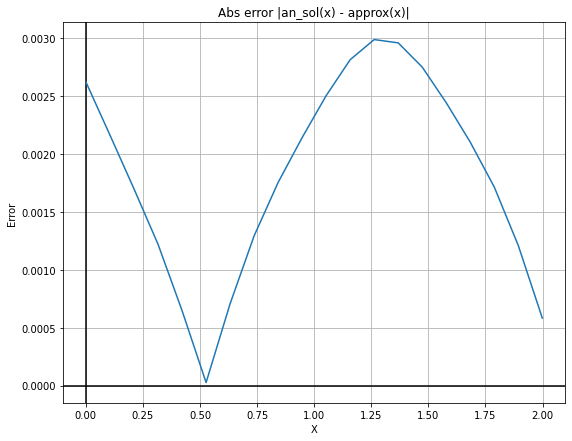

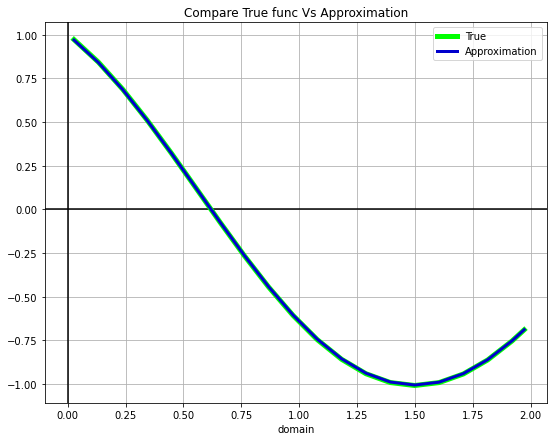

In [34]:
analytical_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №5
$$ u''' - 3u'' + 3u' -u = exp(t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ u''(0)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = \frac{1}{6} * exp(t) * (t^3 + 12*t^2-12*t+6) $$

In [35]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: 
      nth_derivative(function(variable), variable, 3)
    - torch.tensor([3.0]) * nth_derivative(function(variable), variable, 2)
    + torch.tensor([3.0]) * nth_derivative(function(variable), variable, 1)
    - function(variable)
    - torch.exp(variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 2) - torch.tensor([1.0],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

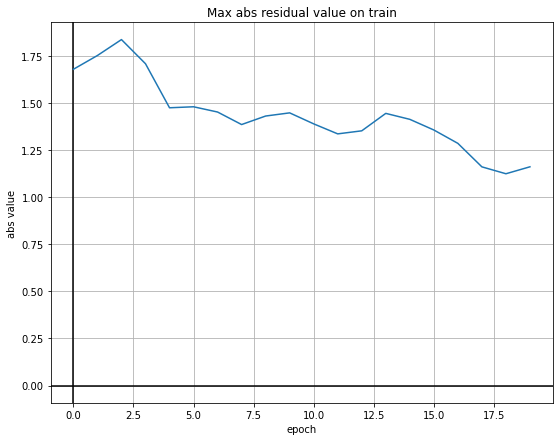

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 1.5839508771896362
Valid max absolute error |Appr(x)-y(x)|: 1.4886349439620972
MAPE on train data: 24.59072917699814 %
MAPE on validation data: 24.995164573192596 %
Max abs value of residual on train at last epoch: 1.1610627174377441 


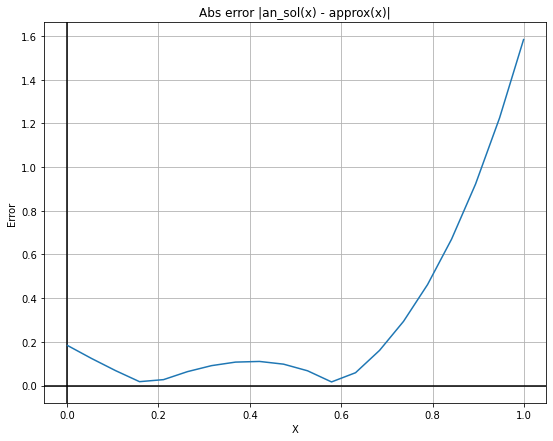

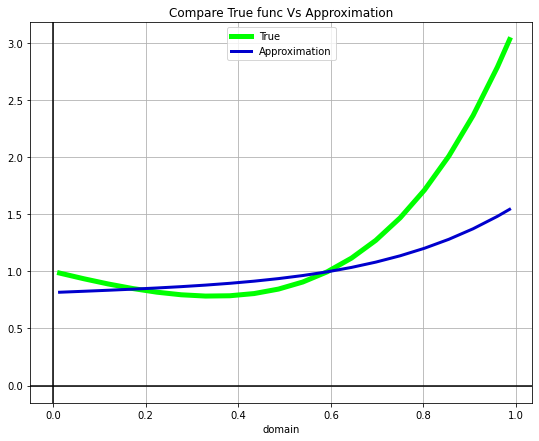

In [36]:
analytical_solution = lambda x: torch.exp(x) * 1/6 * (x*x*x + 12*x*x- 12*x + 6)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №6
$$ u'' + u = -t $$
$$ u(0)=0 $$
$$ t \in [0,1] $$
$$ true\_solution = \frac{sin(x)}{sin(1)} - t $$

In [38]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + function(variable)
    + variable
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([0.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - 0
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

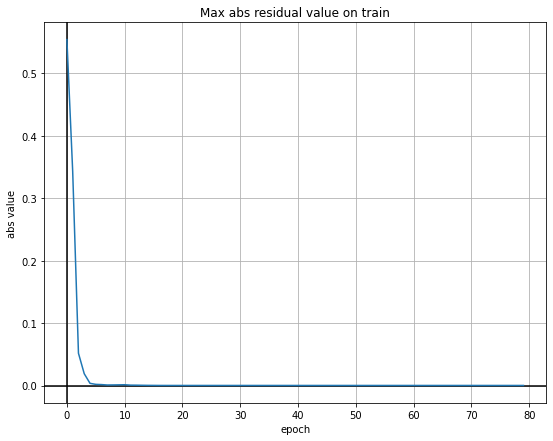

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 2.905726432800293e-06
Valid max absolute error |Appr(x)-y(x)|: 2.9653310775756836e-06
MAPE on train data: 0.004116289710509591 %
MAPE on validation data: 0.004199413888272829 %
Max abs value of residual on train at last epoch: 7.649138569831848e-05 


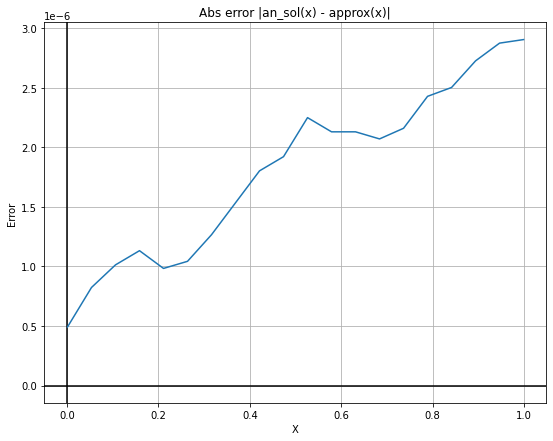

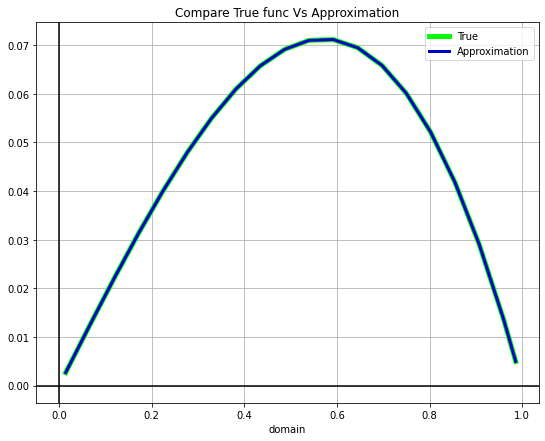

In [39]:
analytical_solution = lambda x: torch.sin(x)/torch.sin(torch.Tensor([1])) - x
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №6
$$ u'' + u = 1 $$
$$ u'(0)=0 $$
$$ u(\frac{\pi}{2})-u'(\frac{\pi}{2})= 2 $$
$$ t \in [0,1] $$
$$ true\_solution = 1 + cos(t) $$

In [40]:
left_bound = 0
right_bound = pi/2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + function(variable)
    - 1
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - nth_derivative(nn_model(x), x, 1) - 2
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

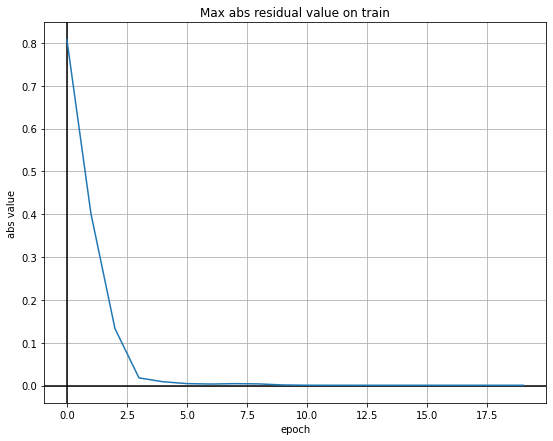

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 3.325939178466797e-05
Valid max absolute error |Appr(x)-y(x)|: 3.2901763916015625e-05
MAPE on train data: 0.0014304659089248162 %
MAPE on validation data: 0.0014233061847335193 %
Max abs value of residual on train at last epoch: 0.0005689859390258789 


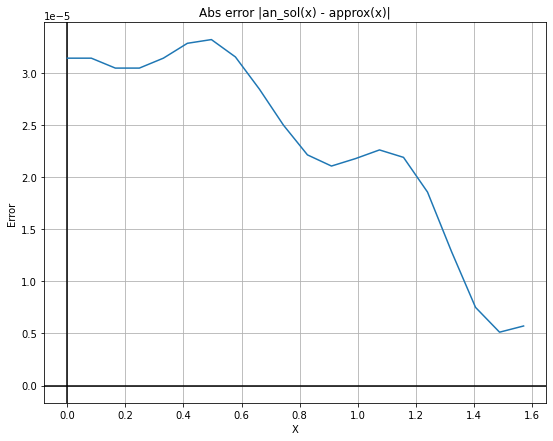

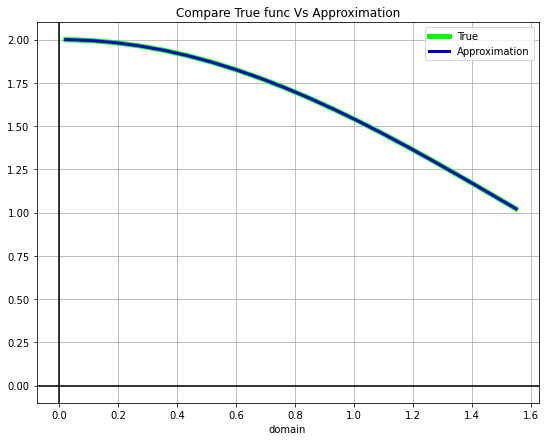

In [41]:
analytical_solution = lambda x: torch.Tensor([1]) + torch.cos(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №7
$$ u'' - u = 4exp(t) $$
$$ u(0)=0 $$
$$ u'(o)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = 2t*exp(t) - sinh(t) $$

In [42]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: nth_derivative(function(variable), variable, 2)
    - function(variable)
    - torch.tensor([4.0],requires_grad=True) * torch.exp(variable)
)
n_points = 20
analytical_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - torch.tensor([1.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

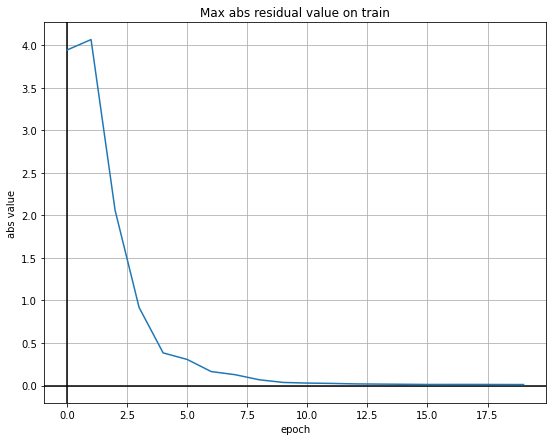

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0037059783935546875
Valid max absolute error |Appr(x)-y(x)|: 0.003665924072265625
MAPE on train data: 0.16796463169157505 %
MAPE on validation data: 0.16451503615826368 %
Max abs value of residual on train at last epoch: 0.011261940002441406 


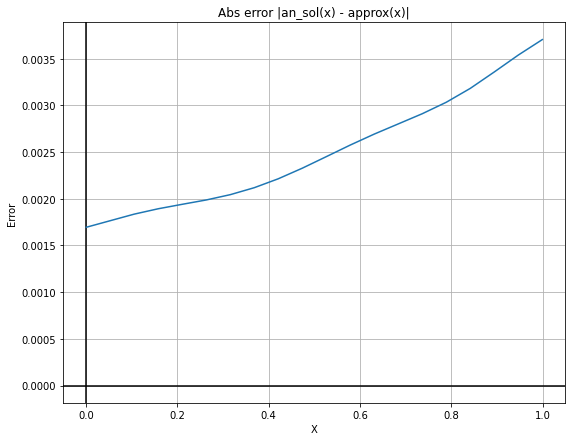

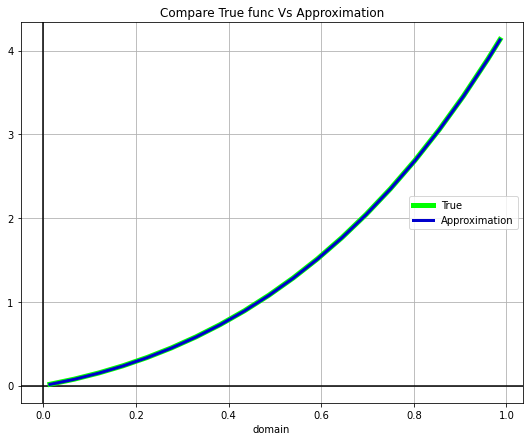

In [43]:
analytical_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №8
$$ (1+t^2)u''-2tu = 0 $$
$$ u(0)=0 $$
$$ u'(0)=3 $$
$$ t \in [0,1] $$
$$ true\_solution = t^3 + 3*t $$

In [44]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: (torch.tensor([1.0],requires_grad=True) + variable*variable)
    * nth_derivative(function(variable), variable, 2)
    - 2 * variable * function(variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - torch.tensor([3.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

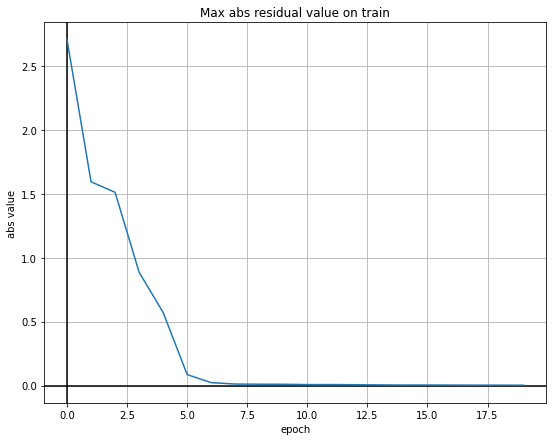

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.034304141998291016
Valid max absolute error |Appr(x)-y(x)|: 0.029688596725463867
MAPE on train data: 0.23292850237339735 %
MAPE on validation data: 0.23407530970871449 %
Max abs value of residual on train at last epoch: 0.002412924077361822 


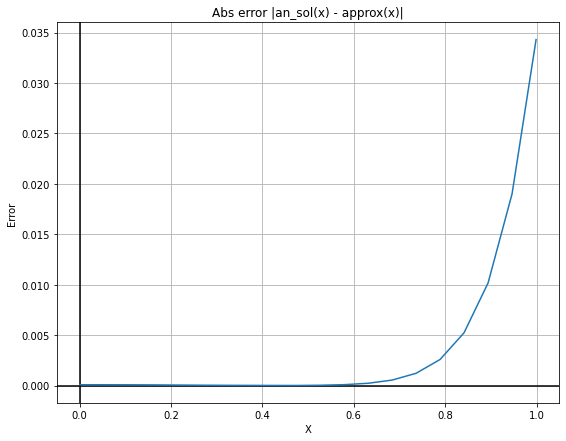

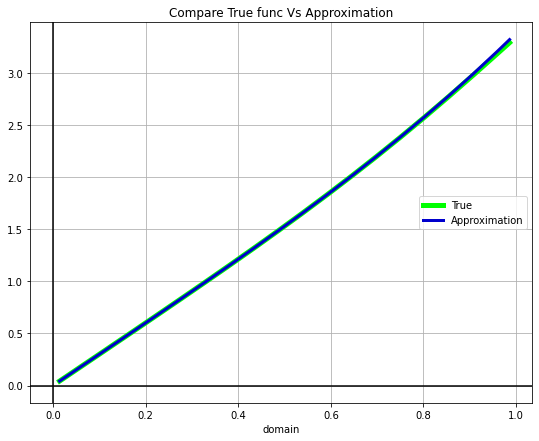

In [45]:
analytical_solution = lambda x: (3*x + pow(x,4)/2 - pow(x,6)/5 + pow(x,7)/42 + 
                           3*pow(x,8)/28 - 7*pow(x,9)/360 - 25*pow(x,10)/378)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №9
$$ u'''+ u'' = \frac{t-1}{t^2} $$
$$ u(1) = \frac{1+e}{e} $$
$$ u'(1) = -\frac{1+e}{e} $$
$$ u''(1) = \frac{1-e}{e} $$
$$ t \in [1,2] $$
$$ true\_sol =  -4t + tln(t) + 7 - 2exp(1-t) + exp(-t) $$

In [47]:
left_bound = 1
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 3)
    + nth_derivative(function(variable), variable, 2)
    - (variable-1)/(variable**2)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - (1+e)/e
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x),x,1) + torch.tensor([(1+e)/e], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x),x,2) - torch.tensor([(1-e)/e], requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

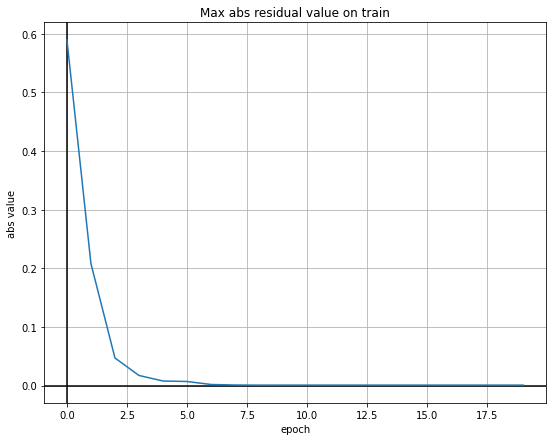

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 1.5169382095336914e-05
Valid max absolute error |Appr(x)-y(x)|: 1.4796853065490723e-05
MAPE on train data: 0.0008403682841162663 %
MAPE on validation data: 0.0008858746696205344 %
Max abs value of residual on train at last epoch: 0.0006504360353574157 


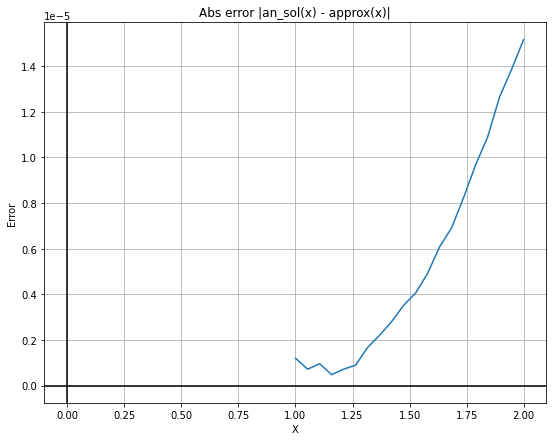

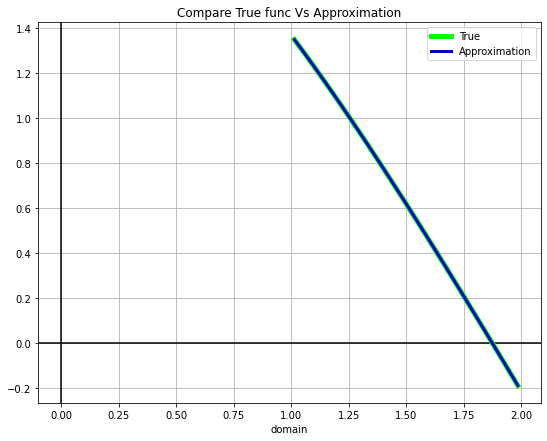

In [48]:
analytical_solution = lambda x: -x*4 + x * torch.log(x) + 7 - 2 * torch.exp(1-x) + torch.exp(-x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №10
$$ u''''+ u'' = \frac{1 + sin^2(t)}{cos^3(t)} $$
$$ u(0) = 1 $$
$$ u'(0) = 0  $$
$$ u''(0) = 0 $$
$$ u'''(0) = 0 $$
$$ t \in [0, 1] $$ 
$$ true\_sol =  (1 + ln(cos(t)))*cos(t) + t * sin(t) $$

In [50]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 4)
    + nth_derivative(function(variable), variable, 2)
    - (torch.tensor([1.0],requires_grad=True) + torch.sin(variable)*torch.sin(variable))
    /(torch.cos(variable)*torch.cos(variable)*torch.cos(variable))
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

fourth_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 3)
fourth_init_cond = OnePointInitialCondition(left_bound, fourth_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond, fourth_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

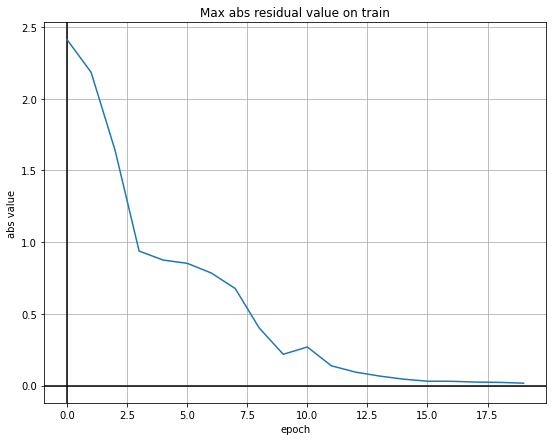

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0058258771896362305
Valid max absolute error |Appr(x)-y(x)|: 0.005720973014831543
MAPE on train data: 0.27986769564449787 %
MAPE on validation data: 0.2857822459191084 %
Max abs value of residual on train at last epoch: 0.0160791277885437 


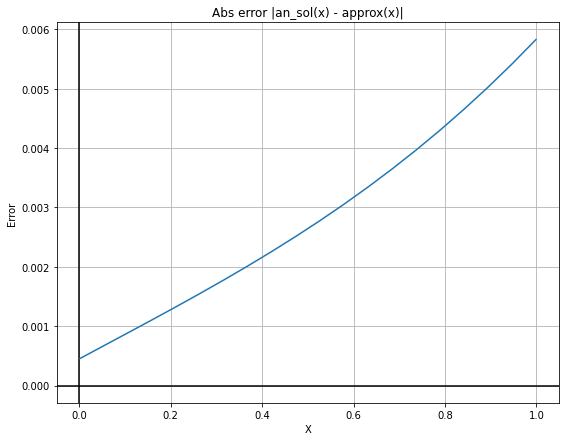

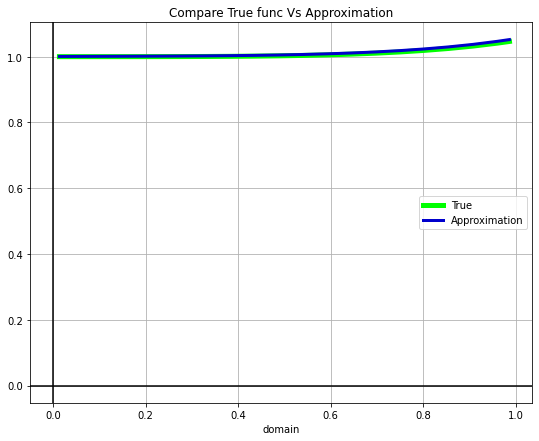

In [51]:
analytical_solution = lambda x: ((torch.tensor([1.0],requires_grad=True) + torch.log(torch.cos(x))) 
                           * torch.cos(x) + x * torch.sin(x))
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №11
$$ u'''+ u' = t*sin(t) + 3*cos(t) $$
$$ u(0) = 1 $$
$$ u'(0) = 2  $$
$$ u''(0) = 0 $$
$$ t \in [0, 1] $$
$$ true\_sol =  1/4 * (-(t^2 - 17) * sin(t) - 9 * t * cos(t) + 4) $$

In [53]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 3)
    + nth_derivative(function(variable), variable, 1)
    - variable * torch.sin(variable) - 3 * torch.cos(variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - torch.tensor([2.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x),x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

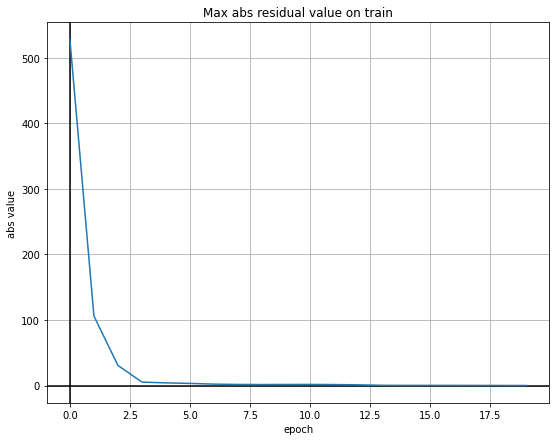

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.03280830383300781
Valid max absolute error |Appr(x)-y(x)|: 0.03234672546386719
MAPE on train data: 0.8539550937712193 %
MAPE on validation data: 0.8589209988713264 %
Max abs value of residual on train at last epoch: 0.034056901931762695 


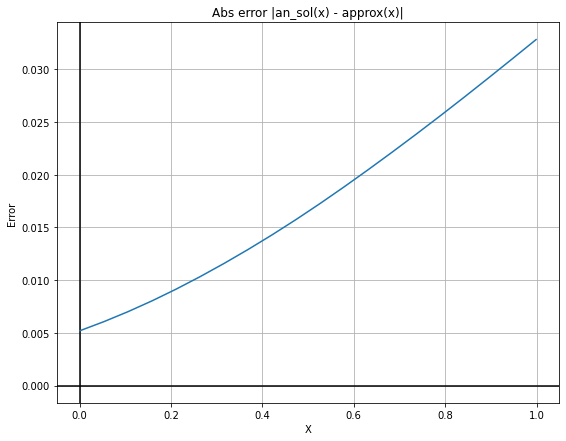

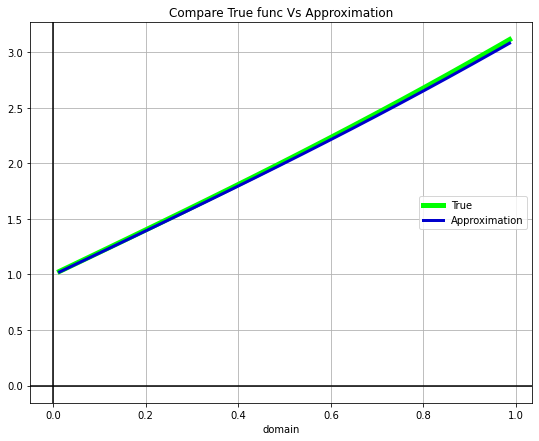

In [54]:
analytical_solution = lambda x: 1/4*(-(x**2-17)*torch.sin(x)-9*x*torch.cos(x)+4)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №12. A physical problem 

A rubber cord with a length of **1** meter is extended by **kf** meters under the action of a force **f** kg. 

By how much will the same cord of length **l** and weight **m** be extended under the action of its own weight, if it is hung at one end?

$$ u'= \frac{km}{l}(l-x) $$
$$ u(0) = 0 $$
$$ x \in [0, l] $$
$$ true\_sol =  \frac{km}{2l}*(l-x)x $$

Lets assume that $l = 3$ meters, $m = 5$ kg, $k = 2\frac{Newton}{meter}$

In [56]:
l = 10
m = 5
k = 2
left_bound = 0
right_bound = l
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 1)
    - k*m/l*(l-variable)
)
n_points = 50

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

boundary_conditions = [first_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

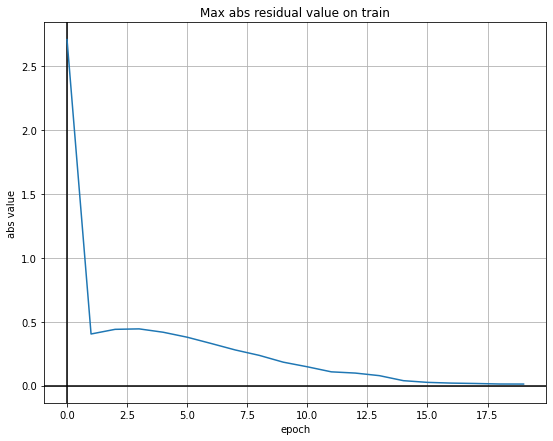

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.058992862701416016
Valid max absolute error |Appr(x)-y(x)|: 0.05567741394042969
MAPE on train data: 0.13623165432363749 %
MAPE on validation data: 0.13564927503466606 %
Max abs value of residual on train at last epoch: 0.01128995418548584 


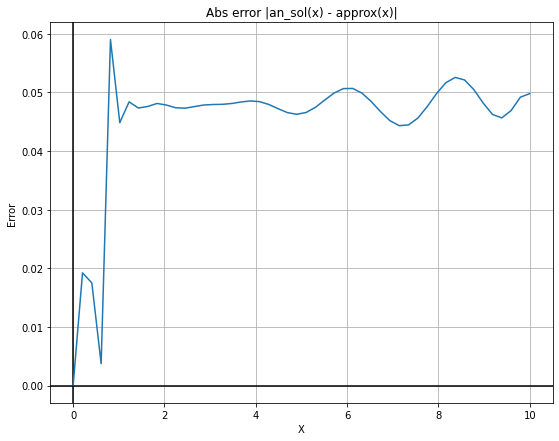

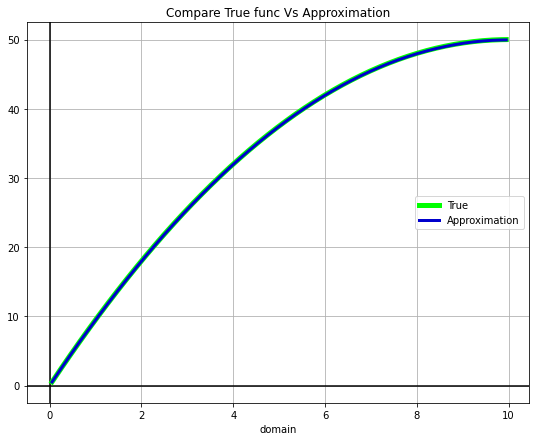

In [57]:
analytical_solution = lambda x: k*m/(2*l)*(2*l-x)*x
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №13
$$ y''+ xy' + \sqrt{x}T_x^{0.5} - 2y= -6x-4x^3 <=> y''+ 2xy' - 2y= -6x-4x^3$$
$$ y(0) = 0 $$
$$ y(1) = 0  $$
$$ x \in [0, 1] $$
$$ true\_sol =  x^2 - x^3 $$

In [58]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: 
    nth_derivative(function(variable), variable, 2)
    + 2 * variable * nth_derivative(function(variable), variable, 1)
    - 2 * function(variable)
    + 6 * variable + 4 * torch.pow(variable, 3)
)
n_points = 20
analytical_solution = lambda x: x * (1 - x * x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x)
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)
boundary_conditions = [first_init_cond, second_init_cond]


start_time = time.time()
main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.670222759246826 seconds ---


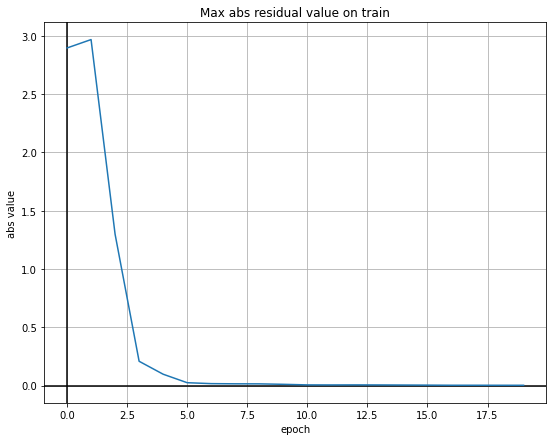

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.00015792320482432842
Valid max absolute error |Appr(x)-y(x)|: 0.00015518255531787872
MAPE on train data: 0.024202722124755383 %
MAPE on validation data: 0.0232396851060912 %
Max abs value of residual on train at last epoch: 0.0019192742183804512 


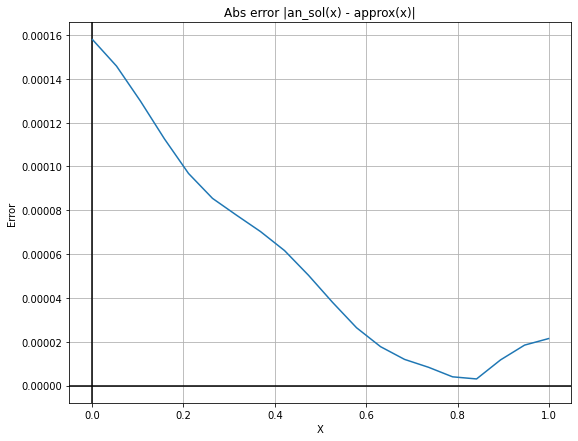

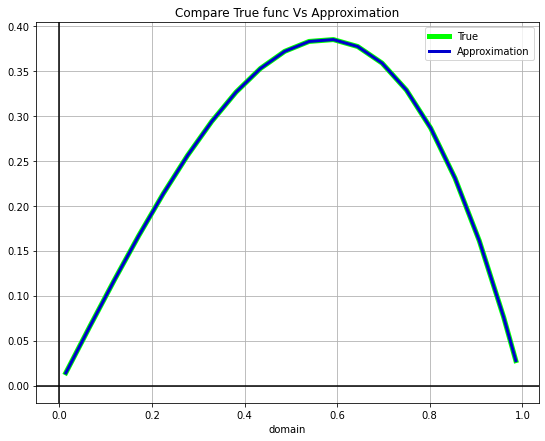

In [59]:
analytical_solution = lambda x: x * (1 - x * x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

In [60]:
report.print_comparison_table()

train data
       Input  Analytical       ANN     Error
0   0.001000    0.001000  0.000842  0.000158
1   0.053526    0.053373  0.053227  0.000146
2   0.106053    0.104860  0.104730  0.000130
3   0.158579    0.154591  0.154479  0.000113
4   0.211105    0.201697  0.201600  0.000097
5   0.263632    0.245309  0.245223  0.000085
6   0.316158    0.284556  0.284478  0.000078
7   0.368684    0.318570  0.318499  0.000070
8   0.421211    0.346480  0.346418  0.000062
9   0.473737    0.367418  0.367367  0.000050
10  0.526263    0.380513  0.380475  0.000038
11  0.578789    0.384897  0.384870  0.000026
12  0.631316    0.379699  0.379681  0.000018
13  0.683842    0.364050  0.364038  0.000012
14  0.736368    0.337081  0.337073  0.000008
15  0.788895    0.297922  0.297918  0.000004
16  0.841421    0.245704  0.245707  0.000003
17  0.893947    0.179557  0.179568  0.000012
18  0.946474    0.098611  0.098629  0.000018
19  0.999000    0.001997  0.002018  0.000021
